In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as pt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#loading dataset
df= pd.read_csv(r"C:\Users\DELL\Documents\Intern\Vehicle Price Prediction\dataset.csv")
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [89]:
df.isnull().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [90]:
df.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


In [91]:
df.columns

Index(['name', 'description', 'make', 'model', 'year', 'price', 'engine',
       'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')

## Analyzing data

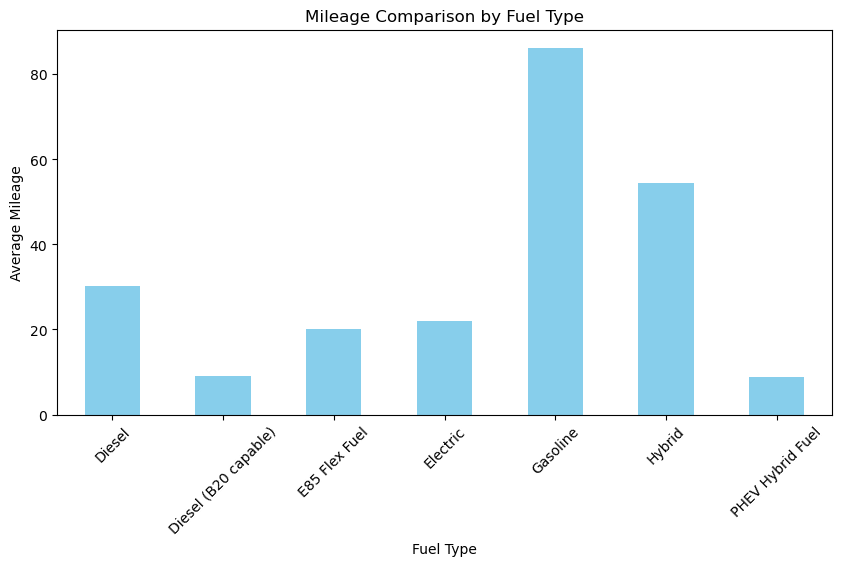

In [93]:

fuel_mileage = df.groupby("fuel")["mileage"].mean()
fuel_mileage.plot(kind="bar", figsize=(10,5), color="skyblue")

plt.xlabel("Fuel Type")
plt.ylabel("Average Mileage")
plt.title("Mileage Comparison by Fuel Type")
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Car maker')

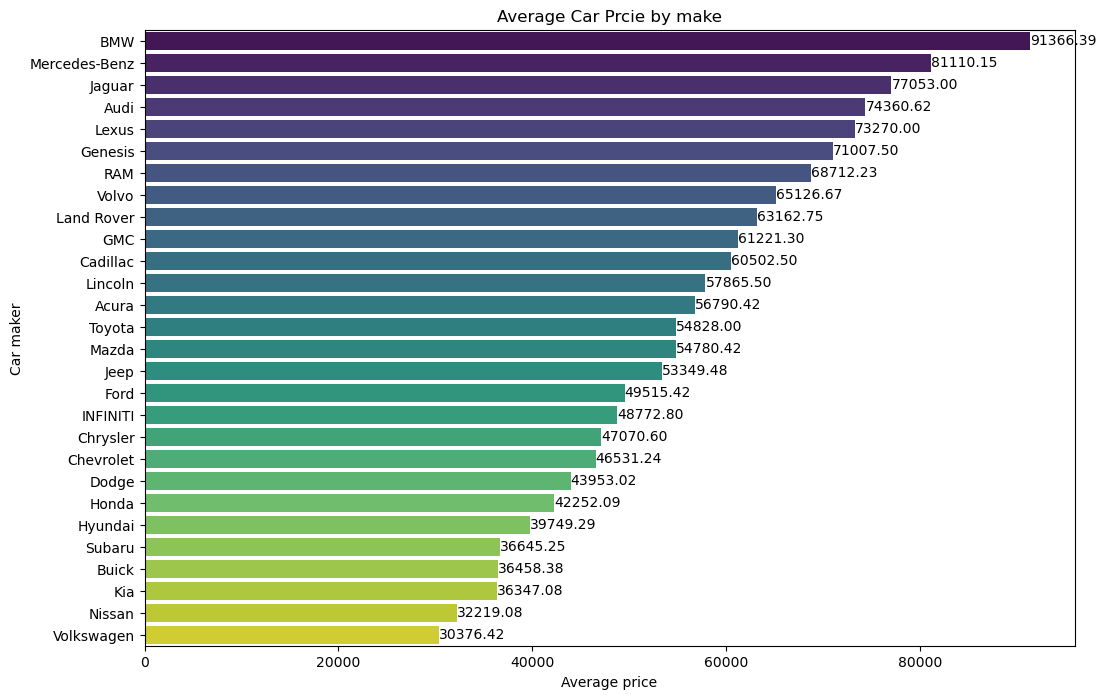

In [94]:
make_price= df.groupby("make")["price"].mean().sort_values(ascending= False).round(2)

figure= plt.figure(figsize= (12,8))
sns.barplot(y=make_price.index, x=make_price.values, hue=make_price.index, palette="viridis", legend=False)

for i, v in enumerate(make_price.values):
    plt.text(v +2, i, f"{v:.2f}", color="black" ,va="center")

plt.title("Average Car Prcie by make")
plt.xlabel("Average price")
plt.ylabel("Car maker")

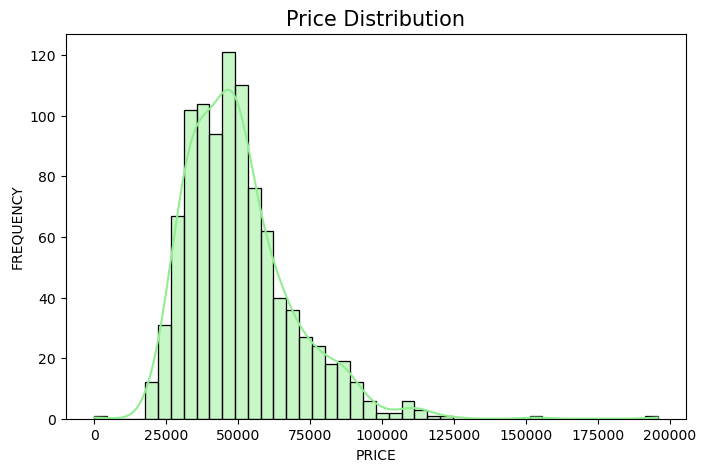

In [95]:
fig= plt.figure(figsize=((8,5)) )

sns.histplot(df["price"],color="lightgreen", kde=True)
plt.title("Price Distribution", fontsize= 15)
plt.xlabel("PRICE", fontsize= 10)
plt.ylabel("FREQUENCY", fontsize= 10)
plt.show()

## cleaning dataset

In [97]:
df=df[df["mileage"] != 0.0]

In [98]:
# removing the columns
df.drop(columns=["name","model","year","description", "engine","exterior_color", "interior_color","doors", "body"], inplace=True)

In [99]:
# filling missing values
df["price"]=df["price"].fillna((df["price"].mean()) )

In [100]:
df=df[df["price"] != 0]
df["price"]=df["price"].astype(int)

In [101]:
# filling missing values
df["cylinders"]=df["cylinders"].fillna(round(df["cylinders"].mean()))

In [102]:
#filling missing values
df["mileage"]=df["mileage"].interpolate(method="linear")
df["mileage"]=round(df["mileage"])
df=df[df["mileage"] <=55 ]

In [103]:
#Transforming the features into numeric values

from sklearn.preprocessing import LabelEncoder ## LabelEncoder is use to convert categorial data to numeric data

label_encode=LabelEncoder()
df["make"]= label_encode.fit_transform(df["make"])
df["fuel"]= label_encode.fit_transform(df["fuel"])
df["drivetrain"]= label_encode.fit_transform(df["drivetrain"])
df["trim"]= label_encode.fit_transform(df["trim"])
df["transmission"]= label_encode.fit_transform(df["transmission"])

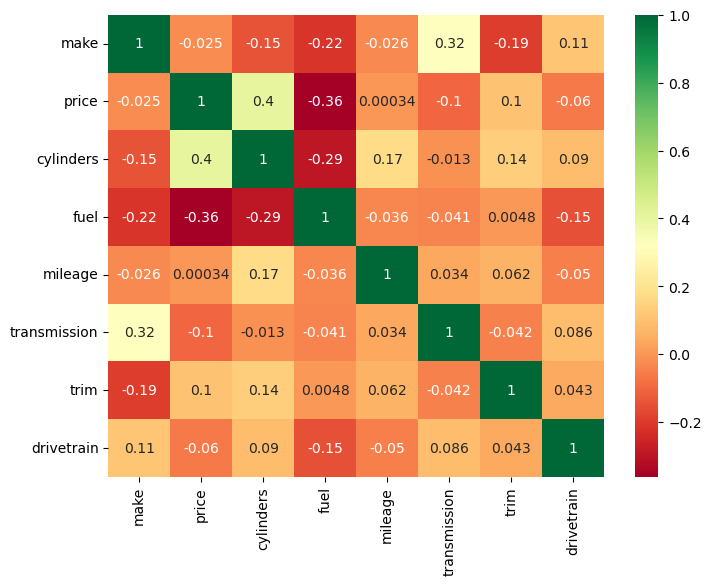

In [104]:
figure= plt.figure(figsize=((8,6)) )
sns.heatmap(df.corr(),annot=True, cmap="RdYlGn" )
plt.show()

## Splitting the dataset for train and testing

In [106]:

y=df["price"] # dependent
x=df.drop("price" , axis=1) # Independent

print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [107]:
model= ExtraTreesRegressor()
model.fit(x, y)

ExtraTreesRegressor()

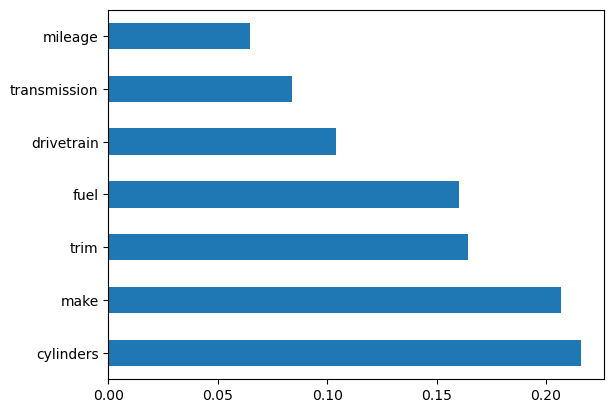

In [108]:
# This horizontal graph represents the most important features in your dataset, as evaluated by the machine learning model.

feat_importance= pd.Series(model.feature_importances_, index=x.columns)
feat_importance.sort_values(ascending=False).plot(kind="barh")
plt.show()

In [109]:
feat_importance = feat_importance / feat_importance.sum()
round(feat_importance *100, 2)

make            20.70
cylinders       21.58
fuel            16.01
mileage          6.47
transmission     8.39
trim            16.45
drivetrain      10.41
dtype: float64

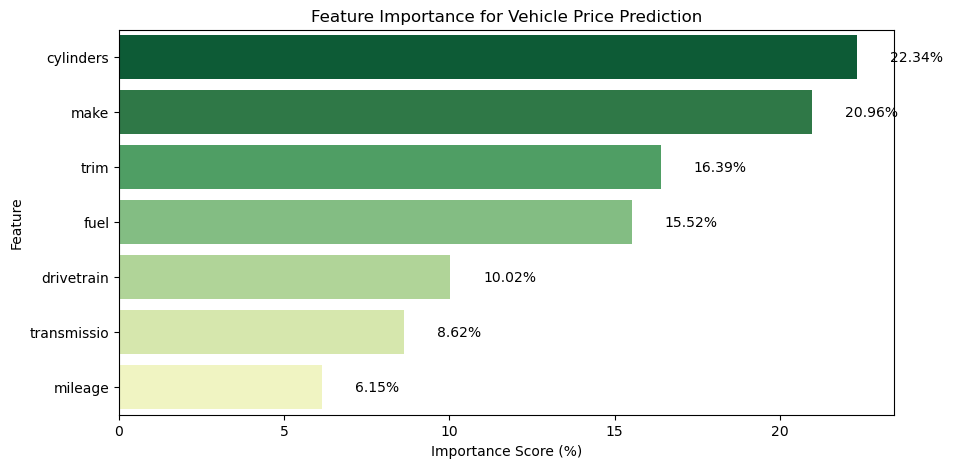

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance Data
importance={
'make' :20.96,
'cylinders': 22.34,
'fuel'     :15.52,
'mileage'  :6.15,
'drivetrain':10.02,
'trim'      : 16.39,
'transmissio' :8.62
}

# Convert to DataFrame
importance_df = pd.DataFrame(list(importance.items()), columns=["Feature", "Importance"])
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Create Bar Chart
plt.figure(figsize=(10,5))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], hue=importance_df["Feature"], palette= "YlGn_r")

plt.xlabel("Importance Score (%)")
plt.ylabel("Feature")
plt.title("Feature Importance for Vehicle Price Prediction")

# Add data labels
for i, v in enumerate(importance_df["Importance"]):
    plt.text(v + 1, i, f"{v:.2f}%", color="black", va="center", fontsize=10)

plt.show()

In [111]:
scaler= StandardScaler()
x= scaler.fit_transform(x)

### Splitting the data into test and train set using library, the ratio being 70% Training data and 30% Test data.

In [113]:

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, train_size= 0.7, random_state=42)

In [114]:
x_train=pd.DataFrame(x_train, columns=["make","cylinders", "fuel", "mileage", "drivetrain","trim","transmission"])
x_test=pd.DataFrame(x_test, columns=["make","cylinders", "fuel", "mileage", "drivetrain","trim","transmission"])


In [115]:
print(type(x_train) )

<class 'pandas.core.frame.DataFrame'>


## Building Model

In [117]:
random_forest_regressor =RandomForestRegressor(max_depth= 40, min_samples_split=4, min_samples_leaf=1, n_estimators=200, random_state=42)
random_forest_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=40, min_samples_split=4, n_estimators=200,
                      random_state=42)

## Finding Accuracy

In [119]:
train_accuracy= random_forest_regressor.score(x_train, y_train)
print(f" Train Accuracy: {round(train_accuracy *100, 1)}%")

test_accuracy= random_forest_regressor.score(x_test, y_test)
print(f" Test Accuracy: {round(test_accuracy *100, 1)}%")

 Train Accuracy: 94.3%
 Test Accuracy: 88.3%


In [120]:
prediction = random_forest_regressor.predict(x_test)

In [121]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print("Mean Squared Error:", round(mse, 2))
print("R^2 Score:", round(r2, 2))

Mean Squared Error: 36281774.38
R^2 Score: 0.88


C:\Users\DELL\AppData\Local\Temp\ipykernel_25448\1520944062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='price', ylabel='Density'>

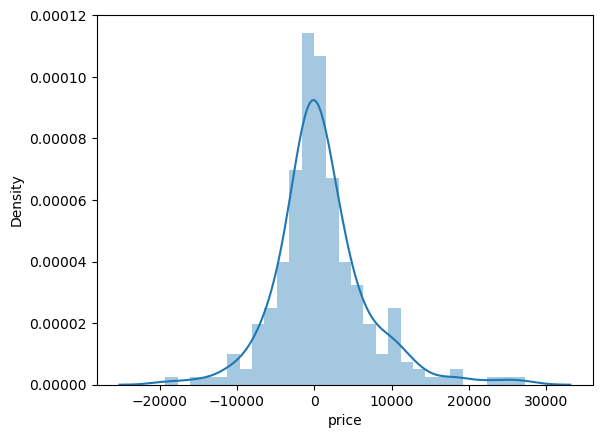

In [122]:
sns.distplot(y_test-prediction)

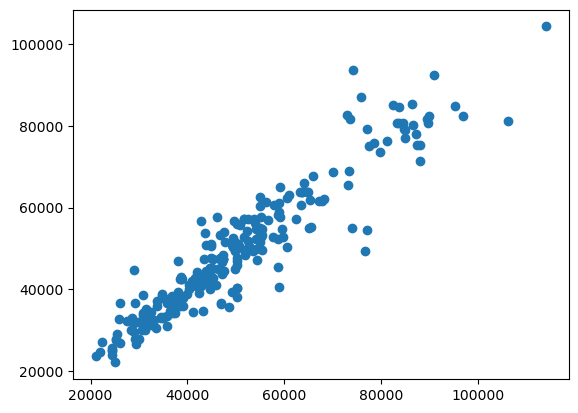

In [123]:
plt.scatter(y_test, prediction)

## 
make value (0-27),
cylinders (3-8),
fuel (0-7),
mileage (1-54),
drivetrain (0-3),
trim (0-175),
transmission (0-34)


In [125]:
new_pridict= pd.DataFrame([[0, 8, 4, 18, 2, 47, 18]],columns=["make","cylinders", "fuel", "mileage", "drivetrain","trim","transmission"])
pred= random_forest_regressor.predict(new_pridict)
pred.round(2)

array([90633.02])

In [126]:
df.to_csv("Vehicle price prediction_clean dataset.csv")

In [127]:
test_data= pd.read_excel(r"C:\Users\DELL\Documents\Intern\Vehicle Price Prediction\test_data.xlsx")
test_data.tail()

,make,cylinders,fuel,mileage,drivetrain,trim,transmission
20,24,7,4,12,0,89,30
21,26,8,3,25,2,90,31
22,2,7,6,52,3,94,27
23,5,6,4,12,1,93,29
24,27,8,7,54,3,175,34


In [128]:
price=random_forest_regressor.predict(test_data)
test_data["price"]=price
test_data["price"]=test_data["price"].round(2)

In [129]:
test_data

,make,cylinders,fuel,mileage,drivetrain,trim,transmission,price
0,2,3,0,34,0,0,0,62406.50
1,4,6,7,54,1,15,23,83330.44
2,5,4,3,21,3,154,27,83394.35
3,6,8,1,33,2,13,21,83394.35
4,12,6,5,12,1,155,29,83330.44
5,22,5,2,18,3,16,34,83394.35
6,23,4,4,19,2,174,23,83394.35
7,27,4,6,1,3,19,36,83495.62
8,12,7,3,23,0,16,27,83644.10
9,10,6,1,17,3,27,17,83394.35
